In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [100]:
# Read CSV file
df1 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection1.csv")
df2 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection2.csv")
df3 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection3.csv")
df4 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection4.csv")
df5 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection5.csv")
df6 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection6.csv")
df7 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection7.csv")
df8 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection8.csv")
emotion_csv = pd.concat([df1,df2,df3, df4, df5, df6, df7, df8])

In [101]:
emotion_csv


,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,frame,face_id,timestamp,success,Emotion Detected
0,0.0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,...,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
1,0.0,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,...,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
2,0.0,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Anger
3,0.0,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Anger
4,0.0,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,Anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1243.0,0.0,0.0,0.0,Sad
4250,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1244.0,0.0,0.0,0.0,Sad
4251,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1245.0,0.0,0.0,0.0,Sad
4252,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1246.0,0.0,0.0,0.0,Sad


In [ ]:
# list of columns
list(emotion_csv.columns)

## Class Imbalance

In [3]:
# Count the occurance of each emotion to see if bias can occur
emotion_csv["Emotion Detected"].value_counts()

Happy       24538
Neutral     15290
Sad         14854
Anger       12903
Surprise    11166
Fear        10796
Disgust      1910
Contempt      239
Name: Emotion Detected, dtype: int64

In [102]:
# Plot the class imbalance
def plotimbalance(csvname, column):
    unique, counts = np.unique(csvname[column], return_counts=True)
    plt.bar(unique, counts)
    plt.xticks()
    plt.ylabel('Number of Samples')
    plt.xlabel('Emotion Detected')
    plt.show()

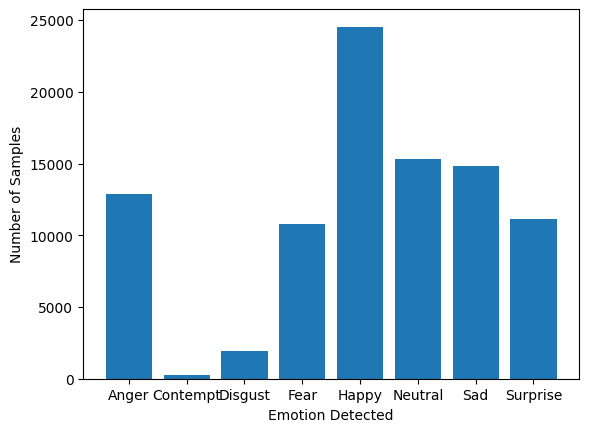

In [103]:
plotimbalance(emotion_csv, "Emotion Detected")

In [104]:
# Replace each emotion with a number value
emotion_csv = emotion_csv.replace(
            {"Happy": 1,
            "Neutral": 2,
            "Sad":3 ,
            "Anger": 4 ,
            "Surprise": 5 ,
            "Disgust":6 ,
            "Contempt": 7, 
            "Fear": 8})

# Remove unnesscary columns for csv with all emotions
emotion_csv = emotion_csv.drop(columns=["frame","face_id", "timestamp", "success", "face"])

emotion_csv

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,59.1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4
1,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,40.8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
2,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,67.1,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,63.4,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,60.4,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


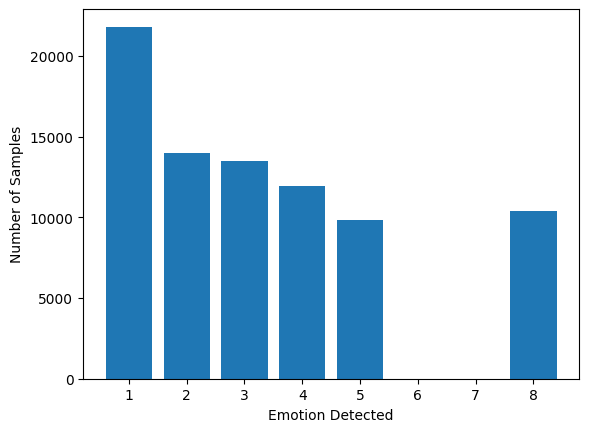

In [105]:
""" 
To deal with the class imbalance we are taking the following approaches:
- Remove the emotions contempt and disgust 
- Oversample the emotions: contempt and disgust
- Undersample the emotion: Happy
"""

# 1. Remove the emotions: Contempt and Disgust
emotion_csv_without_c_d = emotion_csv.drop(emotion_csv[emotion_csv['Emotion Detected'] == 7].index)
emotion_csv_without_c_d = emotion_csv_without_c_d.drop(emotion_csv_without_c_d[emotion_csv_without_c_d['Emotion Detected'] == 6].index)
emotion_csv_without_c_d["Emotion Detected"].value_counts()

# Plot the class imbalance after removing the emotions
plotimbalance(emotion_csv_without_c_d, "Emotion Detected")

In [106]:
# Find the mean sample size of emotion detected
mean_sample_size = round(emotion_csv["Emotion Detected"].value_counts().mean())
mean_sample_size

11462

In [107]:
# Class Labels 
emotion_class = emotion_csv["Emotion Detected"]
emotion_csv_without_c_d_class = emotion_csv_without_c_d["Emotion Detected"]

In [108]:
emotion_csv_without_c_d

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
239,0.975,0.154244,0.078627,-0.984899,-0.088668,0.071323,-0.993504,0.033,0.076,69.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4
240,0.975,0.138883,0.103756,-0.984859,-0.226270,0.135969,-0.964528,-0.045,0.122,63.1,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4
241,0.875,0.223451,0.093836,-0.970188,-0.134327,0.273706,-0.952387,0.046,0.189,50.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
242,0.025,-0.050798,-0.068885,-0.996330,-0.239529,-0.072698,-0.968164,-0.147,-0.072,107.7,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4
243,0.975,0.065336,0.115178,-0.991194,-0.228905,0.108176,-0.967420,-0.083,0.114,69.9,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [109]:
emotion_csv

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,59.1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4
1,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,40.8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
2,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,67.1,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,63.4,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,60.4,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [110]:
# Check what emotions are in the dataframe
emotion_csv["Emotion Detected"].unique()

array([4, 8, 6, 3, 7, 1, 2, 5])

In [111]:
# Check what emotions are in the dataframe to ensure contempt and disgust is not in there
emotion_csv_without_c_d["Emotion Detected"].unique()

array([4, 8, 3, 1, 2, 5])

In [112]:
# Columns with the Action Unit Presence for without and with contempt and disgust
emotion_csv_without_c_d_presence = emotion_csv_without_c_d[[
 'AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',
 'Emotion Detected']]

emotion_csv_presence = emotion_csv[[
 'AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',
 'Emotion Detected']]

In [113]:
emotion_csv_presence

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [114]:
emotion_csv_without_c_d_presence

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
239,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4
240,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4
241,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
242,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4
243,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [115]:
# Columns with the Action Unit Intensity for both csv files
emotion_csv_without_c_d_intensity = emotion_csv_without_c_d[['AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r',
 'Emotion Detected']]


emotion_csv_intensity = emotion_csv[
['AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r',
 'Emotion Detected']
]

In [116]:
emotion_csv_without_c_d_intensity

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Emotion Detected
239,0.89,0.28,0.00,2.06,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.16,0.11,0.54,0.00,0.00,0.0,4
240,0.00,0.00,1.65,0.00,0.92,0.26,2.54,0.0,0.00,0.00,0.33,0.96,0.35,0.00,0.00,0.00,0.0,4
241,0.00,0.23,0.00,0.00,0.00,0.00,0.15,0.0,0.00,0.00,0.00,0.96,0.00,0.00,0.00,0.00,0.0,4
242,1.12,0.00,0.54,2.97,0.55,0.00,0.00,0.0,0.00,0.00,0.25,0.00,2.39,0.00,0.82,1.64,0.0,4
243,0.18,0.00,2.76,0.49,0.57,0.52,0.00,0.0,0.66,0.65,0.19,0.55,3.38,0.00,0.00,1.20,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3
4250,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3
4251,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3
4252,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3


In [117]:
emotion_csv_intensity

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Emotion Detected
0,0.00,0.00,1.40,0.00,0.00,0.02,0.42,1.05,0.00,0.82,0.00,1.13,0.12,0.00,0.0,0.18,0.00,4
1,2.10,1.84,0.20,2.59,0.00,0.61,0.13,0.00,0.00,0.00,0.00,0.00,1.34,0.00,0.0,0.00,0.22,4
2,0.22,0.63,1.42,2.31,0.00,0.00,0.00,0.00,0.00,0.00,0.83,1.22,0.14,0.96,0.0,0.00,0.00,4
3,0.00,0.00,0.00,2.17,0.00,0.19,0.18,1.25,0.00,0.70,0.68,1.06,1.03,0.40,0.0,1.00,0.00,4
4,0.00,0.00,1.55,0.00,1.01,1.85,0.54,0.00,0.22,0.48,0.00,0.99,0.90,0.24,0.0,0.00,0.36,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3
4250,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3
4251,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3
4252,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3


In [118]:
# CSV file made out of the 3d landmarks of face for both csv files
emotion_csv_without_c_d_3d_landmarks = emotion_csv_without_c_d[[
'X_0',
'X_1',
'X_2',
 'X_3',
 'X_4',
 'X_5',
 'X_6',
 'X_7',
 'X_8',
 'X_9',
 'X_10',
 'X_11',
 'X_12',
 'X_13',
 'X_14',
 'X_15',
 'X_16',
 'X_17',
 'X_18',
 'X_19',
 'X_20',
 'X_21',
 'X_22',
 'X_23',
 'X_24',
 'X_25',
 'X_26',
 'X_27',
 'X_28',
 'X_29',
 'X_30',
 'X_31',
 'X_32',
 'X_33',
 'X_34',
 'X_35',
 'X_36',
 'X_37',
 'X_38',
 'X_39',
 'X_40',
 'X_41',
 'X_42',
 'X_43',
 'X_44',
 'X_45',
 'X_46',
 'X_47',
 'X_48',
 'X_49',
 'X_50',
 'X_51',
 'X_52',
 'X_53',
 'X_54',
 'X_55',
 'X_56',
 'X_57',
 'X_58',
 'X_59',
 'X_60',
 'X_61',
 'X_62',
 'X_63',
 'X_64',
 'X_65',
 'X_66',
 'X_67',
 'Y_0',
 'Y_1',
 'Y_2',
 'Y_3',
 'Y_4',
 'Y_5',
 'Y_6',
 'Y_7',
 'Y_8',
 'Y_9',
 'Y_10',
 'Y_11',
 'Y_12',
 'Y_13',
 'Y_14',
 'Y_15',
 'Y_16',
 'Y_17',
 'Y_18',
 'Y_19',
 'Y_20',
 'Y_21',
 'Y_22',
 'Y_23',
 'Y_24',
 'Y_25',
 'Y_26',
 'Y_27',
 'Y_28',
 'Y_29',
 'Y_30',
 'Y_31',
 'Y_32',
 'Y_33',
 'Y_34',
 'Y_35',
 'Y_36',
 'Y_37',
 'Y_38',
 'Y_39',
 'Y_40',
 'Y_41',
 'Y_42',
 'Y_43',
 'Y_44',
 'Y_45',
 'Y_46',
 'Y_47',
 'Y_48',
 'Y_49',
 'Y_50',
 'Y_51',
 'Y_52',
 'Y_53',
 'Y_54',
 'Y_55',
 'Y_56',
 'Y_57',
 'Y_58',
 'Y_59',
 'Y_60',
 'Y_61',
 'Y_62',
 'Y_63',
 'Y_64',
 'Y_65',
 'Y_66',
 'Y_67',
 'Z_0',
 'Z_1',
 'Z_2',
 'Z_3',
 'Z_4',
 'Z_5',
 'Z_6',
 'Z_7',
 'Z_8',
 'Z_9',
 'Z_10',
 'Z_11',
 'Z_12',
 'Z_13',
 'Z_14',
 'Z_15',
 'Z_16',
 'Z_17',
 'Z_18',
 'Z_19',
 'Z_20',
 'Z_21',
 'Z_22',
 'Z_23',
 'Z_24',
 'Z_25',
 'Z_26',
 'Z_27',
 'Z_28',
 'Z_29',
 'Z_30',
 'Z_31',
 'Z_32',
 'Z_33',
 'Z_34',
 'Z_35',
 'Z_36',
 'Z_37',
 'Z_38',
 'Z_39',
 'Z_40',
 'Z_41',
 'Z_42',
 'Z_43',
 'Z_44',
 'Z_45',
 'Z_46',
 'Z_47',
 'Z_48',
 'Z_49',
 'Z_50',
 'Z_51',
 'Z_52',
 'Z_53',
 'Z_54',
 'Z_55',
 'Z_56',
 'Z_57',
 'Z_58',
 'Z_59',
 'Z_60',
 'Z_61',
 'Z_62',
 'Z_63',
 'Z_64',
 'Z_65',
 'Z_66',
 'Z_67',
 'Emotion Detected']]

emotion_csv_3d_landmarks = emotion_csv[[
'X_0',
'X_1',
'X_2',
 'X_3',
 'X_4',
 'X_5',
 'X_6',
 'X_7',
 'X_8',
 'X_9',
 'X_10',
 'X_11',
 'X_12',
 'X_13',
 'X_14',
 'X_15',
 'X_16',
 'X_17',
 'X_18',
 'X_19',
 'X_20',
 'X_21',
 'X_22',
 'X_23',
 'X_24',
 'X_25',
 'X_26',
 'X_27',
 'X_28',
 'X_29',
 'X_30',
 'X_31',
 'X_32',
 'X_33',
 'X_34',
 'X_35',
 'X_36',
 'X_37',
 'X_38',
 'X_39',
 'X_40',
 'X_41',
 'X_42',
 'X_43',
 'X_44',
 'X_45',
 'X_46',
 'X_47',
 'X_48',
 'X_49',
 'X_50',
 'X_51',
 'X_52',
 'X_53',
 'X_54',
 'X_55',
 'X_56',
 'X_57',
 'X_58',
 'X_59',
 'X_60',
 'X_61',
 'X_62',
 'X_63',
 'X_64',
 'X_65',
 'X_66',
 'X_67',
 'Y_0',
 'Y_1',
 'Y_2',
 'Y_3',
 'Y_4',
 'Y_5',
 'Y_6',
 'Y_7',
 'Y_8',
 'Y_9',
 'Y_10',
 'Y_11',
 'Y_12',
 'Y_13',
 'Y_14',
 'Y_15',
 'Y_16',
 'Y_17',
 'Y_18',
 'Y_19',
 'Y_20',
 'Y_21',
 'Y_22',
 'Y_23',
 'Y_24',
 'Y_25',
 'Y_26',
 'Y_27',
 'Y_28',
 'Y_29',
 'Y_30',
 'Y_31',
 'Y_32',
 'Y_33',
 'Y_34',
 'Y_35',
 'Y_36',
 'Y_37',
 'Y_38',
 'Y_39',
 'Y_40',
 'Y_41',
 'Y_42',
 'Y_43',
 'Y_44',
 'Y_45',
 'Y_46',
 'Y_47',
 'Y_48',
 'Y_49',
 'Y_50',
 'Y_51',
 'Y_52',
 'Y_53',
 'Y_54',
 'Y_55',
 'Y_56',
 'Y_57',
 'Y_58',
 'Y_59',
 'Y_60',
 'Y_61',
 'Y_62',
 'Y_63',
 'Y_64',
 'Y_65',
 'Y_66',
 'Y_67',
 'Z_0',
 'Z_1',
 'Z_2',
 'Z_3',
 'Z_4',
 'Z_5',
 'Z_6',
 'Z_7',
 'Z_8',
 'Z_9',
 'Z_10',
 'Z_11',
 'Z_12',
 'Z_13',
 'Z_14',
 'Z_15',
 'Z_16',
 'Z_17',
 'Z_18',
 'Z_19',
 'Z_20',
 'Z_21',
 'Z_22',
 'Z_23',
 'Z_24',
 'Z_25',
 'Z_26',
 'Z_27',
 'Z_28',
 'Z_29',
 'Z_30',
 'Z_31',
 'Z_32',
 'Z_33',
 'Z_34',
 'Z_35',
 'Z_36',
 'Z_37',
 'Z_38',
 'Z_39',
 'Z_40',
 'Z_41',
 'Z_42',
 'Z_43',
 'Z_44',
 'Z_45',
 'Z_46',
 'Z_47',
 'Z_48',
 'Z_49',
 'Z_50',
 'Z_51',
 'Z_52',
 'Z_53',
 'Z_54',
 'Z_55',
 'Z_56',
 'Z_57',
 'Z_58',
 'Z_59',
 'Z_60',
 'Z_61',
 'Z_62',
 'Z_63',
 'Z_64',
 'Z_65',
 'Z_66',
 'Z_67',
 'Emotion Detected']]

In [119]:
# 2. Oversample the emotions: Contempt and disgust
def oversampling(x, y):
    # 2b. Set the sample size for each emotion class for oversampling
    #print(x_train["Emotion Detected"].value_counts())
    strategy = {4:10010 , #Anger
                5:10009 , #Surprise
                6: 10011 , #Disgust
                7: 10007, #Contempt
                8: 10008} #Fear
 
    # 2c. Apply the SMOTE for oversampling: Anger, Surprise, Disgust, Contempt, and Fear
    oversample = SMOTE(sampling_strategy=strategy)
    X, y = oversample.fit_resample(x, y)

    # 2d. Apply undersampling to Happy
    sampling_strategy = {1: 10012}
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
    x_over, y_over = rus.fit_resample(X, y)

    # 2g. Remove the Emotion Detected column in the X_res and replace the values 
    x_over.drop(columns="Emotion Detected")
    
    y_over = y_over.replace({
                1: "Happy",
                2: "Neutral",
                3: "Sad", 
                4: "Anger",
                5: "Surprise",
                6: "Disgust", 
                7: "Contempt",
                8: "Fear"})
     
    return x_over, y_over

In [120]:
# 3. Undersample the emotion: Happy with Contempt and Disgust removed
def unsample(x, y):
    
    # 3b. Undersample emotion: Happy in the training dataset
    sampling_strategy = {1: 9000}
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
    X_res, y_res = rus.fit_resample(x, y)
    
    # print(X_res["Emotion Detected"].value_counts()
    
    # Remove the Emotion Detected Column in the X_res
    X_res.drop(columns="Emotion Detected")
    
    return X_res, y_res

## Training and Testing Spilts

In [121]:
 # Split the new dataframe into training and testing sets for without emotions disgust and contempt
x_train_without_p, x_test_without_p, y_train_without_p, y_test_without_p = train_test_split(emotion_csv_without_c_d_presence, emotion_csv_without_c_d_class, test_size=0.33, random_state=42)

x_train_without_i, x_test_without_i, y_train_without_i, y_test_without_i = train_test_split(emotion_csv_without_c_d_intensity, emotion_csv_without_c_d_class, test_size=0.33, random_state=42)

x_train_without_l, x_test_without_l, y_train_without_l, y_test_without_l = train_test_split(emotion_csv_without_c_d_3d_landmarks, emotion_csv_without_c_d_class, test_size=0.33, random_state=42)

In [122]:
# Drop Emotion Detected column from without contempt and disgsut dataframes
x_test_without_p = x_test_without_p.drop(columns="Emotion Detected")
x_test_without_i = x_test_without_i.drop(columns="Emotion Detected")
x_test_without_l = x_test_without_l.drop(columns="Emotion Detected")

In [123]:
emotion_csv_without_c_d_presence

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
239,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4
240,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4
241,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
242,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4
243,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [124]:
 # Split the new dataframe into training and testing sets 
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(emotion_csv_presence, emotion_class, test_size=0.33, random_state=42)

x_train_i, x_test_i, y_train_i, y_test_i = train_test_split(emotion_csv_intensity, emotion_class, test_size=0.33, random_state=42)

x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(emotion_csv_3d_landmarks, emotion_class, test_size=0.33, random_state=42)

In [126]:
# Drop the Emotion Detected Column from all test columns
x_test_p = x_test_p.drop(columns="Emotion Detected")
x_test_i = x_test_i.drop(columns="Emotion Detected")
x_test_l = x_test_l.drop(columns="Emotion Detected")

In [127]:
y_test_p

4475     1
7752     8
12934    1
11069    1
1714     2
        ..
6291     8
11798    1
19832    3
4562     1
3198     1
Name: Emotion Detected, Length: 30260, dtype: int64

In [128]:
# Replace Value
y_test_p = y_test_p.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"})
y_test_p

4475       Happy
7752        Fear
12934      Happy
11069      Happy
1714     Neutral
          ...   
6291        Fear
11798      Happy
19832        Sad
4562       Happy
3198       Happy
Name: Emotion Detected, Length: 30260, dtype: object

In [129]:
y_test_i = y_test_i.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"})
y_test_i

4475       Happy
7752        Fear
12934      Happy
11069      Happy
1714     Neutral
          ...   
6291        Fear
11798      Happy
19832        Sad
4562       Happy
3198       Happy
Name: Emotion Detected, Length: 30260, dtype: object

In [130]:
y_test_l = y_test_l.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"})

y_test_l

4475       Happy
7752        Fear
12934      Happy
11069      Happy
1714     Neutral
          ...   
6291        Fear
11798      Happy
19832        Sad
4562       Happy
3198       Happy
Name: Emotion Detected, Length: 30260, dtype: object

In [194]:
y_test_without_i = y_test_without_i.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            8: "Fear"})
y_test_without_i

20236         Sad
11724    Surprise
10059        Fear
12423       Happy
3205        Happy
           ...   
10941     Neutral
474         Happy
7792      Neutral
1204      Neutral
10285        Fear
Name: Emotion Detected, Length: 26854, dtype: object

In [195]:
y_test_without_l = y_test_without_l.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            8: "Fear"})
y_test_without_l

20236         Sad
11724    Surprise
10059        Fear
12423       Happy
3205        Happy
           ...   
10941     Neutral
474         Happy
7792      Neutral
1204      Neutral
10285        Fear
Name: Emotion Detected, Length: 26854, dtype: object

In [196]:
y_test_without_p = y_test_without_p.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            8: "Fear"})
y_test_without_p

20236         Sad
11724    Surprise
10059        Fear
12423       Happy
3205        Happy
           ...   
10941     Neutral
474         Happy
7792      Neutral
1204      Neutral
10285        Fear
Name: Emotion Detected, Length: 26854, dtype: object

In [132]:
# Apply the oversample function 
x_over_p, y_over_p = oversampling(x_train_p, y_train_p)
x_over_i, y_over_i = oversampling(x_train_i, y_train_i)
x_over_l, y_over_l = oversampling(x_train_l, y_train_l)

In [133]:
x_over_p

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
11806,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1
6627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
25376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
30590,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,8
86626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,8
86627,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.862868,0.0,1.0,0.0,1.0,0.862868,0.0,1.0,8
86628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,8


In [134]:
x_train_p

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
1781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2824,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2
1637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
4687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4
15333,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5
9312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
860,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4


In [135]:
# Apply the undersample function
x_under_without_p, y_under_without_p = unsample(x_train_without_p, y_train_without_p)
x_under_without_i, y_under_without_i =unsample(x_train_without_i, y_train_without_i)
x_under_without_l, y_under_without_l = unsample(x_train_without_l, y_train_without_l)

In [136]:
x_train_without_i

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Emotion Detected
20227,0.76,0.11,0.04,0.28,0.00,0.00,0.00,0.00,0.07,0.00,0.14,0.67,0.13,0.00,1.60,0.53,0.00,3
11086,0.49,0.42,0.06,0.32,0.00,0.03,0.00,0.00,0.00,0.00,0.30,1.20,0.00,0.00,0.12,0.59,0.02,5
12162,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.27,0.54,0.00,0.05,1.01,0.26,1.42,1.12,0.44,0.08,5
2355,0.00,0.00,0.00,0.16,1.65,0.00,0.09,2.54,2.86,1.33,0.00,0.14,1.05,0.00,2.33,0.12,0.00,1
447,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,1.32,2.27,0.00,0.03,0.00,0.00,0.18,0.97,0.70,1.63,0.98,0.15,1.46,0.00,1.21,0.00,0.44,4
6113,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
2273,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5
1099,0.00,0.00,0.85,0.00,0.00,2.28,0.00,0.00,0.00,0.00,0.00,1.35,0.17,0.00,0.16,0.05,0.63,4


In [137]:
x_under_without_i

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Emotion Detected
6021,0.10,0.22,0.62,0.00,1.14,0.24,0.45,0.29,0.96,0.96,0.65,0.66,0.25,0.05,0.38,0.29,0.04,1
10938,0.01,0.00,0.28,0.25,0.99,0.69,0.89,1.16,1.24,0.64,0.44,0.77,0.11,0.29,0.98,0.24,0.63,1
872,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
6341,0.00,0.00,0.00,0.00,0.56,0.09,0.00,0.97,0.96,0.64,0.00,0.32,0.00,0.00,0.38,0.00,0.00,1
15241,0.00,0.00,0.00,0.00,1.40,0.00,0.00,2.07,1.98,0.96,0.00,0.00,0.49,0.21,1.96,0.43,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9578,0.47,0.18,0.61,0.65,0.17,0.00,0.00,0.26,0.00,0.00,0.04,0.93,0.00,0.16,1.10,0.48,0.14,8
11413,0.00,0.00,0.00,0.00,0.72,0.93,0.76,0.73,0.36,0.00,0.41,0.00,0.00,0.00,0.64,0.00,0.51,8
12180,2.03,1.94,0.52,1.95,0.00,0.00,0.00,0.00,0.00,0.00,0.21,1.17,0.84,0.52,0.25,1.01,0.00,8
4934,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8


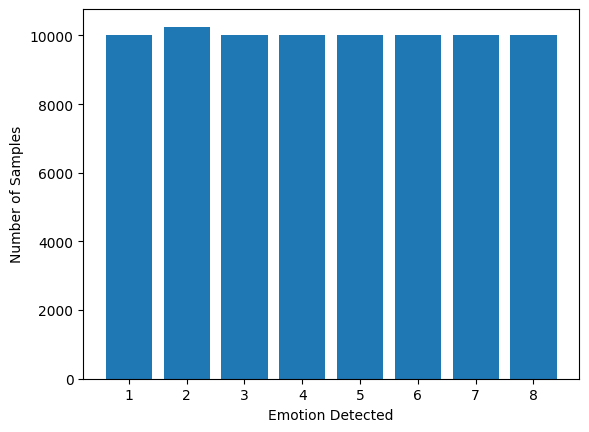

In [138]:
# 3c. Plot to see if there is an imbalance ?
plotimbalance(x_over_p, "Emotion Detected")

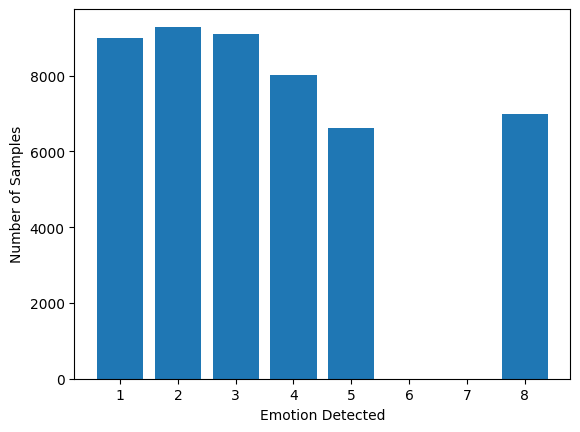

In [139]:
# 3c. Plot to see if there is an imbalance after undersampling happy
plotimbalance(x_under_without_p, "Emotion Detected")

In [140]:
x_under_without_p

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
2888,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3196,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1
1787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1023,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1
5772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
11413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
12180,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,8
4934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [141]:
y_under_without_p

2888     1
3196     1
1787     1
1023     1
5772     1
        ..
9578     8
11413    8
12180    8
4934     8
6113     8
Name: Emotion Detected, Length: 49011, dtype: int64

In [142]:
# Remove Column Emotion Detectwed column after oversampling and undersampling
x_under_without_p = x_under_without_p.drop(columns="Emotion Detected")
x_under_without_i = x_under_without_i.drop(columns="Emotion Detected")
x_under_without_l = x_under_without_l.drop(columns="Emotion Detected")

x_over_p = x_over_p.drop(columns="Emotion Detected")
x_over_i = x_over_i.drop(columns="Emotion Detected")
x_over_l = x_over_l.drop(columns="Emotion Detected")

In [151]:
y_under_without_p = y_under_without_p.replace({1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"})
y_under_without_p

2888     Happy
3196     Happy
1787     Happy
1023     Happy
5772     Happy
         ...  
9578      Fear
11413     Fear
12180     Fear
4934      Fear
6113      Fear
Name: Emotion Detected, Length: 49011, dtype: object

In [161]:
y_under_without_l = y_under_without_l.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"})
y_under_without_l

1906     Happy
6341     Happy
10036    Happy
6892     Happy
4273     Happy
         ...  
9578      Fear
11413     Fear
12180     Fear
4934      Fear
6113      Fear
Name: Emotion Detected, Length: 49011, dtype: object

In [155]:
y_under_without_i = y_under_without_i.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"}
)
y_under_without_i


6021     Happy
10938    Happy
872      Happy
6341     Happy
15241    Happy
         ...  
9578      Fear
11413     Fear
12180     Fear
4934      Fear
6113      Fear
Name: Emotion Detected, Length: 49011, dtype: object

In [156]:
y_over_p = y_over_p.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"}
)

y_over_p

11806    Happy
6627     Happy
25376    Happy
584      Happy
30590    Happy
         ...  
86625     Fear
86626     Fear
86627     Fear
86628     Fear
86629     Fear
Name: Emotion Detected, Length: 80329, dtype: object

In [157]:
y_over_i = y_over_i.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"}
)

y_over_i

56905    Happy
23886    Happy
29319    Happy
4379     Happy
35104    Happy
         ...  
86625     Fear
86626     Fear
86627     Fear
86628     Fear
86629     Fear
Name: Emotion Detected, Length: 80329, dtype: object

In [158]:
y_over_l = y_over_l.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"}
)

y_over_l

2588     Happy
2633     Happy
16942    Happy
53845    Happy
13279    Happy
         ...  
86625     Fear
86626     Fear
86627     Fear
86628     Fear
86629     Fear
Name: Emotion Detected, Length: 80329, dtype: object

## Models

### Support Vector Machine

In [21]:
"""
Fine Tune the Support Vector Machine by finding the best attributes:
 - Kernal: Linear and RBF
 - RBF Kernal: C and Gamma
 - Linear Kernal: C , dual  "Auto"
"""

# Set Kernals
svm_model_rbf = svm.SVC(kernel="rbf")
svm_model_linear = svm.SVC()

# Find the best value for gamma and c
c_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 1000]
gamma_range = [0.1, 1, 10, 100]

param_grid = dict(gamma=gamma_range, C=c_range)

#Create the GridSearchCV object
grid_clf = GridSearchCV(svm.SVC(kernel="rbf"), param_grid)

#Fit the data with the best possible parameters
grid_clf = grid_clf.fit(x_over_i, y_over_i)

#Print the best estimator with it's parameters
print(grid_clf.best_params_)

In [162]:
svm_rbf = svm.SVC(kernel="rbf",
                  C = 10,
                  gamma = 0.1)

#### SVM Model for datasets without emotions: contempt and disgust


In [ ]:
# Presences
svm_rbf_p = svm_rbf.fit(x_under_without_p, y_under_without_p)
svm_y_p = svm_rbf_p.predict(x_test_without_p)

In [171]:
# Intensity
svm_rbf_i = svm_rbf.fit(x_under_without_i, y_under_without_i)
svm_y_i = svm_rbf_i.predict(x_test_without_i)

In [172]:
# Landmarks
svm_rbf_l = svm_rbf.fit(x_under_without_l, y_under_without_l)
svm_y_l = svm_rbf_l.predict(x_test_without_l)

In [297]:
# Presences and Intesity Combines

emotion_csv_without_c_d_i_p = emotion_csv_without_c_d[['AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c',
       'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c',
       'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r',
       'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r',
       'AU25_r', 'AU26_r', 'AU45_r', 'Emotion Detected']]

x_train_without_p_i, x_test_without_p_i, y_train_without_p_i, y_test_without_p_i = train_test_split(emotion_csv_without_c_d_i_p, emotion_csv_without_c_d_class, test_size=0.33, random_state=42)

# Undersample the Happy Emotion
x_train_under_i_p, y_train_under_i_p = unsample(x_train_without_p_i, y_train_without_p_i)

In [298]:
# Drop Emotion Detected Column and replace interger values with emotion labels
y_test_without_p_i = y_test_without_p_i.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"}
)

y_train_under_i_p = y_train_under_i_p.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"}
)

x_train_under_i_p = x_train_under_i_p.drop(columns="Emotion Detected")
x_test_without_p_i = x_test_without_p_i.drop(columns="Emotion Detected")

In [300]:
svm_rbf_without_p_i = svm_rbf.fit(x_train_under_i_p, y_train_under_i_p)
svm_rbf_without_y_p_i_ = svm_rbf_without_p_i.predict(x_test_without_p_i)

### SVM Model for datasets with emotions: contempt and disgust


In [173]:
# SVM Model for datasets with emotions: contempt and disgust
svm_rbf_p_with = svm_rbf.fit(x_over_p, y_over_p)
svm_y_p_with = svm_rbf_p_with.predict(x_test_p)

svm_rbf_i_with = svm_rbf.fit(x_over_i, y_over_i)
svm_y_i_with = svm_rbf_i_with.predict(x_test_i)

svm_rbf_l_with = svm_rbf.fit(x_over_l, y_over_l)
svm_y_l_with = svm_rbf_l_with.predict(x_test_l)


### SVM [Linear] Model for datasets without emotions: contempt and disgust


In [174]:
svm_linear = LinearSVC(C = 10)

In [175]:
svm_linear_p = svm_linear.fit(x_under_without_p, y_under_without_p)
svm_linear_y_p = svm_linear_p.predict(x_test_without_p)

svm_linear_i = svm_linear.fit(x_under_without_i, y_under_without_i)
svm_linear_y_i = svm_linear_i.predict(x_test_without_i)

svm_linear_l = svm_linear.fit(x_under_without_l, y_under_without_l)
svm_linear_y_l = svm_linear_l.predict(x_test_without_l)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### SVM [Linear] Model for datasets with emotions: contempt and disgust


In [176]:
# SVM Model for datasets with emotions: contempt and disgust
svm_linear_p_with = svm_linear.fit(x_over_p, y_over_p)
svm_linear_y_p_with = svm_linear_p_with.predict(x_test_p)

svm_linear_i_with = svm_linear.fit(x_over_i, y_over_i)
svm_linear_y_i_with = svm_linear_i_with.predict(x_test_i)

svm_linear_l_with = svm_linear.fit(x_over_l, y_over_l)
svm_linear_y_l_with = svm_linear_l_with.predict(x_test_l)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Naives Bayes

In [177]:
# Gaussian NB
gnd = GaussianNB()

# Complement NB
cnb = ComplementNB(alpha=1)

In [178]:
# Gaussian Model for datasets without emotions: contempt and disgust
gnd_p = gnd.fit(x_under_without_p, y_under_without_p)
gnd_p_y = gnd_p.predict(x_test_without_p)

gnd_i = gnd.fit(x_under_without_i, y_under_without_i)
gnd_i_y = gnd_i.predict(x_test_without_i)

gnd_l = gnd.fit(x_under_without_l, y_under_without_l)
gnd_l_y = gnd_l.predict(x_test_without_l)

In [179]:
# Gaussian Model for datasets with emotions: contempt and disgust
gnd_p_with = gnd.fit(x_over_p, y_over_p)
gnd_p_with_y = gnd_p_with.predict(x_test_p)

gnd_i_with = gnd.fit(x_over_i, y_over_i)
gnd_i_with_y = gnd_i_with.predict(x_test_i)

gnd_l_with = gnd.fit(x_over_l, y_over_l)
gnd_l_with_y = gnd_l_with.predict(x_test_l)

In [302]:
gnd_without_p_i = gnd.fit(x_train_under_i_p, y_train_under_i_p)
gnd__without_y_p_i_ = gnd_without_p_i.predict(x_test_without_p_i)

In [180]:
# Complement NB
cnb = ComplementNB(alpha=1)

In [181]:
# Complemnt Model for datasets without emotions: contempt and disgust
cnb_p = cnb.fit(x_under_without_p, y_under_without_p)
cnb_p_y = cnb_p.predict(x_test_without_p)

cnb_i = cnb.fit(x_under_without_i, y_under_without_i)
cnb_i_y = cnb_i.predict(x_test_without_i)

In [182]:
# Complemnt Model for datasets with emotions: contempt and disgust
cnd_p_with = cnb.fit(x_over_p, y_over_p)
cnd_p_with_y = cnd_p_with.predict(x_test_p)

cnd_i_with = cnb.fit(x_over_i, y_over_i)
cnd_i_with_y = cnd_i_with.predict(x_test_i)

# Random Forest

In [183]:
# Fine Tuning Attributes for Random Forest: n_estimators, max_features, min_sample_leaf

# n_estimators = [2, 4, 8, 16, 32, 64, 100]

# max_Features = [Auto, sqrt, 0.2]

# min_sample_leaf = [75, 95, 100]

rf = RandomForestClassifier()

rf_params = {"n_estimators": [2, 4, 8, 16, 32, 64, 100],
             "max_features": ["Auto", "sqrt", "0.2"],
             "min_samples_leaf": [75, 95, 100]}

rf_cv_model = GridSearchCV(rf, rf_params).fit(x_under_without_p, y_under_without_p)

print(rf_cv_model.best_params_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 315.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3

{'max_features': 'sqrt', 'min_samples_leaf': 75, 'n_estimators': 64}


In [184]:
# Random Forest Model with the best parameters
rf = RandomForestClassifier(max_features= 'sqrt', 
                            min_samples_leaf= 75,
                            n_estimators= 100)

In [45]:
# Random Forest Model for datasets without emotions: contempt and disgust
rf_without_i = rf.fit(x_under_without_i, y_under_without_i)
rf_without_i_y = rf_without_i.predict(x_test_without_i)

rf_without_p = rf.fit(x_under_without_p, y_under_without_p)
rf_without_p_y = rf_without_p.predict(x_test_without_p)

rf_without_l = rf.fit(x_under_without_l, y_under_without_l)
rf_without_l_y = rf_without_l.predict(x_test_without_l)

In [185]:
# Random Forest Model for datasets with emotions
rf_i = rf.fit(x_over_i, y_over_i)
rf_i_y = rf_i.predict(x_test_i)

rf_p = rf.fit(x_over_p, y_over_p)
rf_p_y = rf_p.predict(x_test_p)

rf_l = rf.fit(x_over_l, y_over_l)
rf_l_y = rf_l.predict(x_test_l)

# Decision Tree

In [186]:
# Decision Tree Model
tree = DecisionTreeClassifier(splitter="best",
                              max_depth=None,
                              min_samples_split=2,
                              min_samples_leaf=1)

In [187]:
# Decision Tree Model for datasets without emotions: contempt and disgust
tree_without_i = tree.fit(x_under_without_i, y_under_without_i)
tree_without_i_y = tree_without_i.predict(x_test_without_i)

tree_without_p = tree.fit(x_under_without_p, y_under_without_p)
tree_without_p_y = tree_without_p.predict(x_test_without_p)

tree_without_l = tree.fit(x_under_without_l, y_under_without_l)
tree_without_l_y = tree_without_l.predict(x_test_without_l)


In [188]:
# Decision Tree Model for datasets with emotions
tree_i = tree.fit(x_over_i, y_over_i)
tree_i_y = tree_i.predict(x_test_i)

tree_p = tree.fit(x_over_p, y_over_p)
tree_p_y = tree_p.predict(x_test_p)

tree_l = tree.fit(x_over_l, y_over_l)
tree_l_y = tree_l.predict(x_test_l)

# Reports

In [189]:
# Metircs on how well the models performed

def metics_reports(y_label_training, y_label_prediction):
    
    # Accuracy Score Prediciton 
    print("Accurary Score")
    print(accuracy_score(y_label_training, y_label_prediction))
    
    # Confusion Matrix Prediciton 
    print("Confusin Matrix Score")
    cm = confusion_matrix(y_label_training, y_label_prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    #F1 Score
    print(f1_score(y_label_training, y_label_prediction, average='macro'))
    
    # Classification Report
    print(classification_report(y_label_training, y_label_prediction))

## SVM Model for datasets without emotions: contempt and disgust


Without Emotion Presences
Accurary Score
0.37659194161018844
Confusin Matrix Score


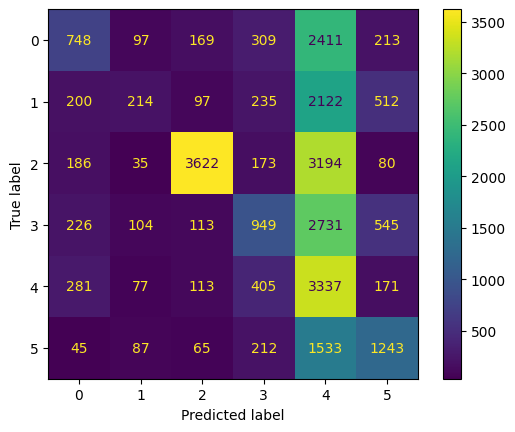

0.3389782213760002
              precision    recall  f1-score   support

       Anger       0.44      0.19      0.27      3947
        Fear       0.35      0.06      0.11      3380
       Happy       0.87      0.50      0.63      7290
     Neutral       0.42      0.20      0.27      4668
         Sad       0.22      0.76      0.34      4384
    Surprise       0.45      0.39      0.42      3185

    accuracy                           0.38     26854
   macro avg       0.46      0.35      0.34     26854
weighted avg       0.51      0.38      0.38     26854



In [198]:
print("Without Emotion Presences")
metics_reports(y_test_without_p, svm_y_p)

Without Emotion Intensity
Accurary Score
0.3988232665524689
Confusin Matrix Score


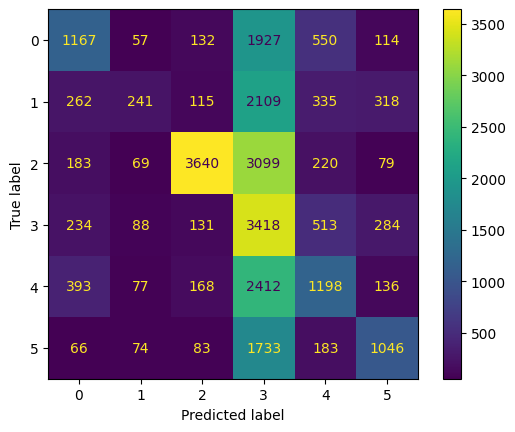

0.36780740195471706
              precision    recall  f1-score   support

       Anger       0.51      0.30      0.37      3947
        Fear       0.40      0.07      0.12      3380
       Happy       0.85      0.50      0.63      7290
     Neutral       0.23      0.73      0.35      4668
         Sad       0.40      0.27      0.32      4384
    Surprise       0.53      0.33      0.41      3185

    accuracy                           0.40     26854
   macro avg       0.49      0.37      0.37     26854
weighted avg       0.52      0.40      0.40     26854



In [199]:
print("Without Emotion Intensity")
metics_reports(y_test_without_i, svm_y_i)

Without Emotion Landmarks
Accurary Score
0.23709689431742012
Confusin Matrix Score


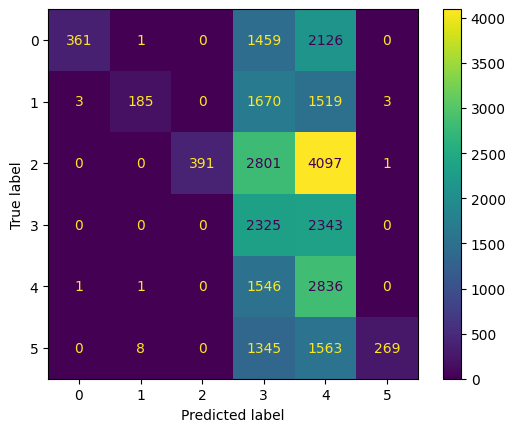

0.18716419634169634
              precision    recall  f1-score   support

       Anger       0.99      0.09      0.17      3947
        Fear       0.95      0.05      0.10      3380
       Happy       1.00      0.05      0.10      7290
     Neutral       0.21      0.50      0.29      4668
         Sad       0.20      0.65      0.30      4384
    Surprise       0.99      0.08      0.16      3185

    accuracy                           0.24     26854
   macro avg       0.72      0.24      0.19     26854
weighted avg       0.72      0.24      0.18     26854



In [200]:
print("Without Emotion Landmarks")
metics_reports(y_test_without_l, svm_y_l)

Without Emotion Presence and Intensity
Accurary Score
0.43993446041558054
Confusin Matrix Score


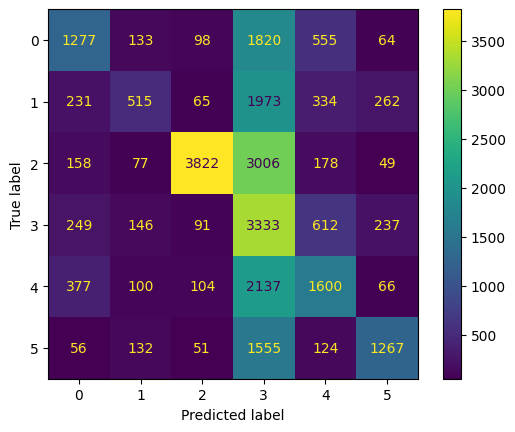

0.4273897318973292
              precision    recall  f1-score   support

       Anger       0.54      0.32      0.41      3947
        Fear       0.47      0.15      0.23      3380
       Happy       0.90      0.52      0.66      7290
     Neutral       0.24      0.71      0.36      4668
         Sad       0.47      0.36      0.41      4384
    Surprise       0.65      0.40      0.49      3185

    accuracy                           0.44     26854
   macro avg       0.55      0.41      0.43     26854
weighted avg       0.58      0.44      0.46     26854



In [304]:
print("Without Emotion Presence and Intensity")
metics_reports(y_test_without_p_i, svm_rbf_without_y_p_i_)


## SVM Model for datasets with emotions: contempt and disgust

With Emotions Presences
Accurary Score
0.3734963648380701
Confusin Matrix Score


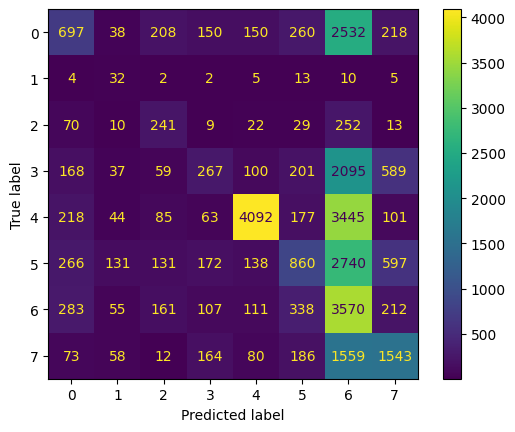

0.3069667567421019
              precision    recall  f1-score   support

       Anger       0.39      0.16      0.23      4253
    Contempt       0.08      0.44      0.13        73
     Disgust       0.27      0.37      0.31       646
        Fear       0.29      0.08      0.12      3516
       Happy       0.87      0.50      0.63      8225
     Neutral       0.42      0.17      0.24      5035
         Sad       0.22      0.74      0.34      4837
    Surprise       0.47      0.42      0.44      3675

    accuracy                           0.37     30260
   macro avg       0.38      0.36      0.31     30260
weighted avg       0.49      0.37      0.37     30260



In [201]:
print("With Emotions Presences")
metics_reports(y_test_p, svm_y_p_with)


With Emotions Intensity
Accurary Score
0.37273628552544613
Confusin Matrix Score


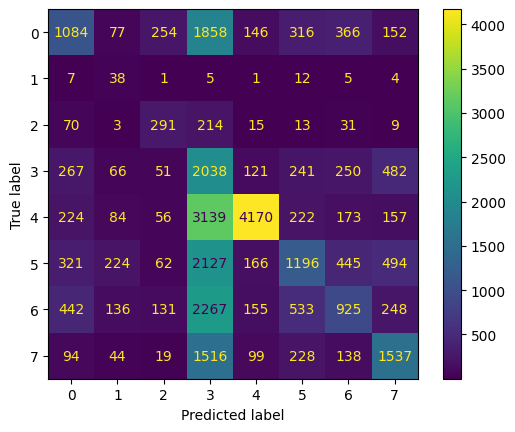

0.33857734875676604
              precision    recall  f1-score   support

       Anger       0.43      0.25      0.32      4253
    Contempt       0.06      0.52      0.10        73
     Disgust       0.34      0.45      0.39       646
        Fear       0.15      0.58      0.24      3516
       Happy       0.86      0.51      0.64      8225
     Neutral       0.43      0.24      0.31      5035
         Sad       0.40      0.19      0.26      4837
    Surprise       0.50      0.42      0.45      3675

    accuracy                           0.37     30260
   macro avg       0.40      0.39      0.34     30260
weighted avg       0.51      0.37      0.40     30260



In [202]:
print("With Emotions Intensity")
metics_reports(y_test_i, svm_y_i_with)


With Emotions Landmarks
Accurary Score
0.29514210178453404
Confusin Matrix Score


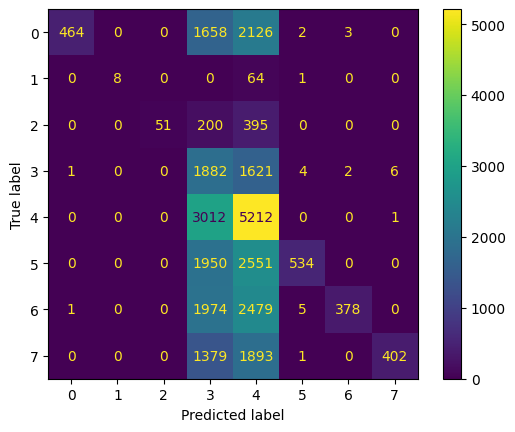

0.21745057072145962
              precision    recall  f1-score   support

       Anger       1.00      0.11      0.20      4253
    Contempt       1.00      0.11      0.20        73
     Disgust       1.00      0.08      0.15       646
        Fear       0.16      0.54      0.24      3516
       Happy       0.32      0.63      0.42      8225
     Neutral       0.98      0.11      0.19      5035
         Sad       0.99      0.08      0.14      4837
    Surprise       0.98      0.11      0.20      3675

    accuracy                           0.30     30260
   macro avg       0.80      0.22      0.22     30260
weighted avg       0.71      0.30      0.25     30260



In [203]:
print("With Emotions Landmarks")
metics_reports(y_test_l, svm_y_l_with)

## SVM Linear Model for datasets without emotions: contempt and disgust


Accurary Score
0.3625530647203396
Confusin Matrix Score


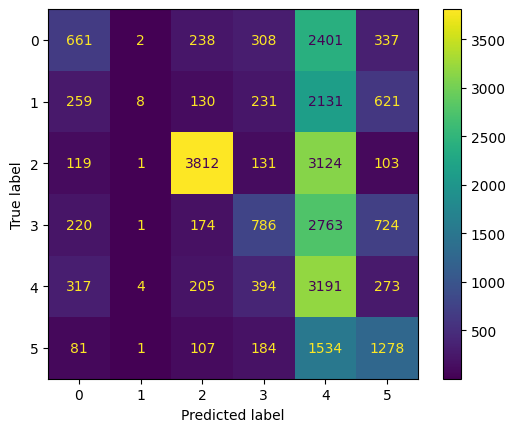

0.3052697466268152
              precision    recall  f1-score   support

       Anger       0.40      0.17      0.24      3947
        Fear       0.47      0.00      0.00      3380
       Happy       0.82      0.52      0.64      7290
     Neutral       0.39      0.17      0.23      4668
         Sad       0.21      0.73      0.33      4384
    Surprise       0.38      0.40      0.39      3185

    accuracy                           0.36     26854
   macro avg       0.44      0.33      0.31     26854
weighted avg       0.49      0.36      0.35     26854



In [204]:
metics_reports(y_test_without_p, svm_linear_y_p)

Accurary Score
0.36553213673940566
Confusin Matrix Score


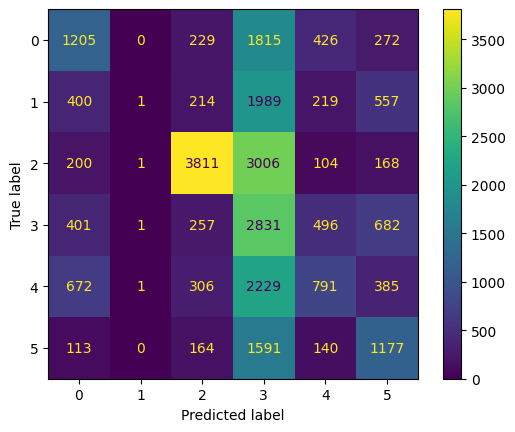

0.3148154610089791
              precision    recall  f1-score   support

       Anger       0.40      0.31      0.35      3947
        Fear       0.25      0.00      0.00      3380
       Happy       0.77      0.52      0.62      7290
     Neutral       0.21      0.61      0.31      4668
         Sad       0.36      0.18      0.24      4384
    Surprise       0.36      0.37      0.37      3185

    accuracy                           0.37     26854
   macro avg       0.39      0.33      0.31     26854
weighted avg       0.44      0.37      0.36     26854



In [205]:
metics_reports(y_test_without_i, svm_linear_y_i)

Accurary Score
0.23229314068667611
Confusin Matrix Score


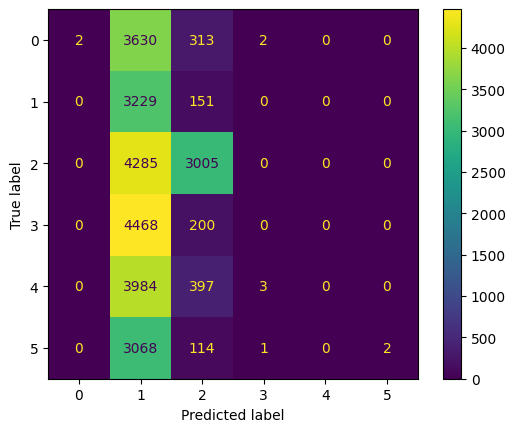

0.12903476405504555
              precision    recall  f1-score   support

       Anger       1.00      0.00      0.00      3947
        Fear       0.14      0.96      0.25      3380
       Happy       0.72      0.41      0.52      7290
     Neutral       0.00      0.00      0.00      4668
         Sad       0.00      0.00      0.00      4384
    Surprise       1.00      0.00      0.00      3185

    accuracy                           0.23     26854
   macro avg       0.48      0.23      0.13     26854
weighted avg       0.48      0.23      0.17     26854



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [206]:
metics_reports(y_test_without_l, svm_linear_y_l)

## SVM Linear Model for datasets with emotions: contempt and disgust


Accurary Score
0.30872438863185725
Confusin Matrix Score


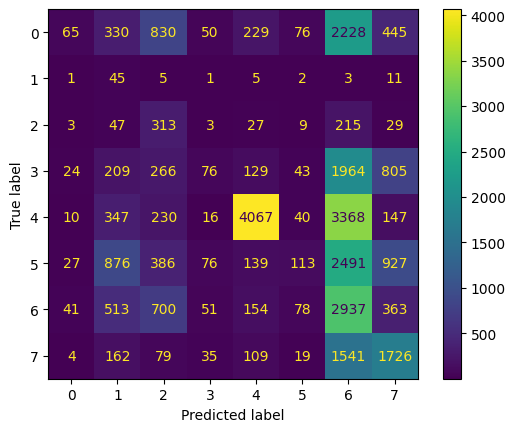

0.20911721775120015
              precision    recall  f1-score   support

       Anger       0.37      0.02      0.03      4253
    Contempt       0.02      0.62      0.03        73
     Disgust       0.11      0.48      0.18       646
        Fear       0.25      0.02      0.04      3516
       Happy       0.84      0.49      0.62      8225
     Neutral       0.30      0.02      0.04      5035
         Sad       0.20      0.61      0.30      4837
    Surprise       0.39      0.47      0.42      3675

    accuracy                           0.31     30260
   macro avg       0.31      0.34      0.21     30260
weighted avg       0.44      0.31      0.29     30260



In [207]:
metics_reports(y_test_p, svm_linear_y_p_with)

Accurary Score
0.2909451421017845
Confusin Matrix Score


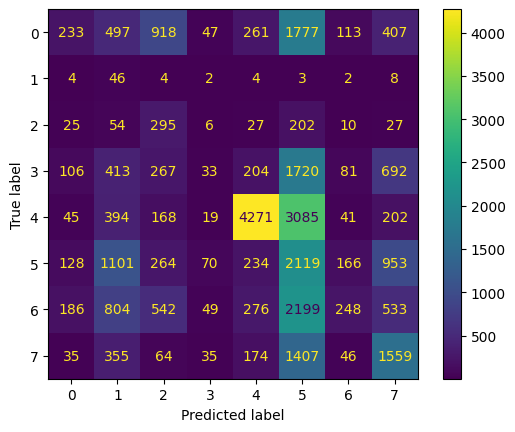

0.20798486018556583
              precision    recall  f1-score   support

       Anger       0.31      0.05      0.09      4253
    Contempt       0.01      0.63      0.02        73
     Disgust       0.12      0.46      0.19       646
        Fear       0.13      0.01      0.02      3516
       Happy       0.78      0.52      0.62      8225
     Neutral       0.17      0.42      0.24      5035
         Sad       0.35      0.05      0.09      4837
    Surprise       0.36      0.42      0.39      3675

    accuracy                           0.29     30260
   macro avg       0.28      0.32      0.21     30260
weighted avg       0.40      0.29      0.29     30260



In [208]:
metics_reports(y_test_i, svm_linear_y_i_with)

Accurary Score
0.27181097157964307
Confusin Matrix Score


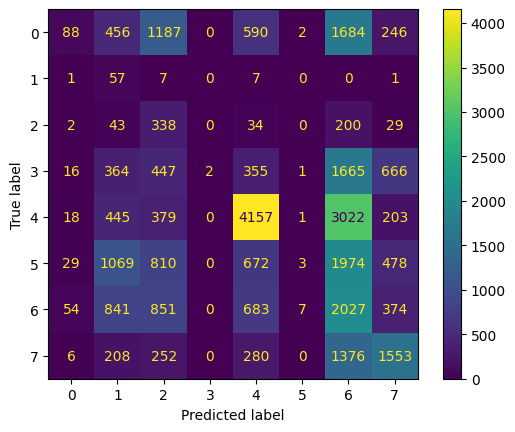

0.1796054133008351
              precision    recall  f1-score   support

       Anger       0.41      0.02      0.04      4253
    Contempt       0.02      0.78      0.03        73
     Disgust       0.08      0.52      0.14       646
        Fear       1.00      0.00      0.00      3516
       Happy       0.61      0.51      0.55      8225
     Neutral       0.21      0.00      0.00      5035
         Sad       0.17      0.42      0.24      4837
    Surprise       0.44      0.42      0.43      3675

    accuracy                           0.27     30260
   macro avg       0.37      0.33      0.18     30260
weighted avg       0.46      0.27      0.25     30260



In [209]:
metics_reports(y_test_l, svm_linear_y_l_with)

## Naives Bayes: Gauassin for the dataset without emotions


Without Emotion Presences
Accurary Score
0.32807030609964993
Confusin Matrix Score


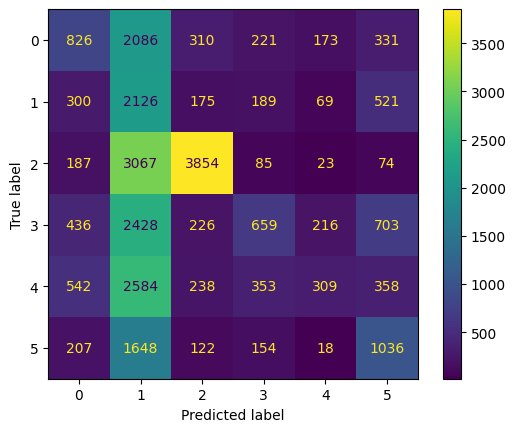

0.29898346295704176
              precision    recall  f1-score   support

       Anger       0.33      0.21      0.26      3947
        Fear       0.15      0.63      0.25      3380
       Happy       0.78      0.53      0.63      7290
     Neutral       0.40      0.14      0.21      4668
         Sad       0.38      0.07      0.12      4384
    Surprise       0.34      0.33      0.33      3185

    accuracy                           0.33     26854
   macro avg       0.40      0.32      0.30     26854
weighted avg       0.45      0.33      0.34     26854



In [210]:
print("Without Emotion Presences")
metics_reports(y_test_without_p, gnd_p_y)

Without Emotion Intensity
Accurary Score
0.3367840917554182
Confusin Matrix Score


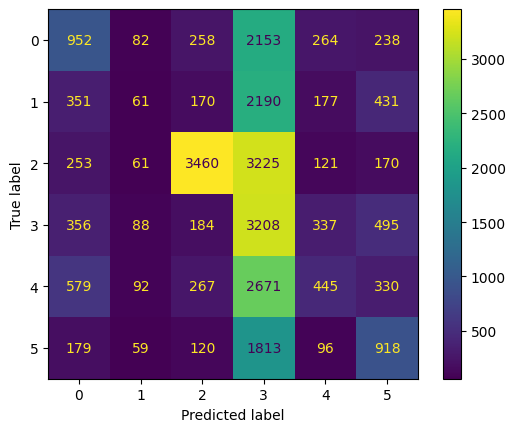

0.2836300308603375
              precision    recall  f1-score   support

       Anger       0.36      0.24      0.29      3947
        Fear       0.14      0.02      0.03      3380
       Happy       0.78      0.47      0.59      7290
     Neutral       0.21      0.69      0.32      4668
         Sad       0.31      0.10      0.15      4384
    Surprise       0.36      0.29      0.32      3185

    accuracy                           0.34     26854
   macro avg       0.36      0.30      0.28     26854
weighted avg       0.41      0.34      0.32     26854



In [211]:
print("Without Emotion Intensity")
metics_reports(y_test_without_i, gnd_i_y)

Accurary Score
0.3571534966857824
Confusin Matrix Score


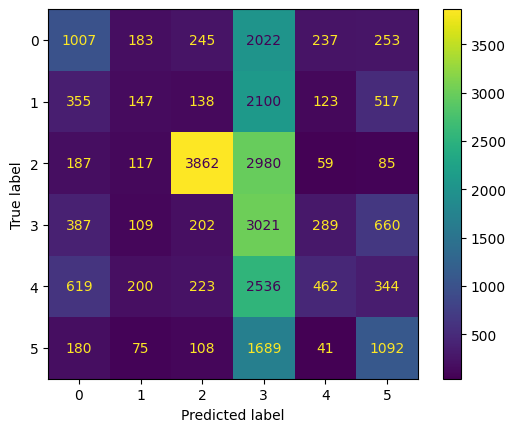

0.30834596282331467
              precision    recall  f1-score   support

       Anger       0.37      0.26      0.30      3947
        Fear       0.18      0.04      0.07      3380
       Happy       0.81      0.53      0.64      7290
     Neutral       0.21      0.65      0.32      4668
         Sad       0.38      0.11      0.17      4384
    Surprise       0.37      0.34      0.36      3185

    accuracy                           0.36     26854
   macro avg       0.39      0.32      0.31     26854
weighted avg       0.44      0.36      0.35     26854



In [305]:
metics_reports(y_test_without_p_i, gnd__without_y_p_i_)


## Naives Bayes: Guassin for the dataset with emotions


With Emotions Presences
Accurary Score
0.2866820885657634
Confusin Matrix Score


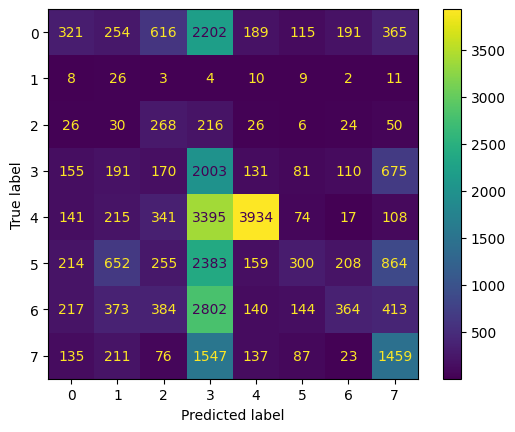

0.22226041934376461
              precision    recall  f1-score   support

       Anger       0.26      0.08      0.12      4253
    Contempt       0.01      0.36      0.03        73
     Disgust       0.13      0.41      0.19       646
        Fear       0.14      0.57      0.22      3516
       Happy       0.83      0.48      0.61      8225
     Neutral       0.37      0.06      0.10      5035
         Sad       0.39      0.08      0.13      4837
    Surprise       0.37      0.40      0.38      3675

    accuracy                           0.29     30260
   macro avg       0.31      0.30      0.22     30260
weighted avg       0.45      0.29      0.30     30260



In [212]:
print("With Emotions Presences")
metics_reports(y_test_p, gnd_p_with_y)

With Emotions Intensity
Accurary Score
0.29342366159947125
Confusin Matrix Score


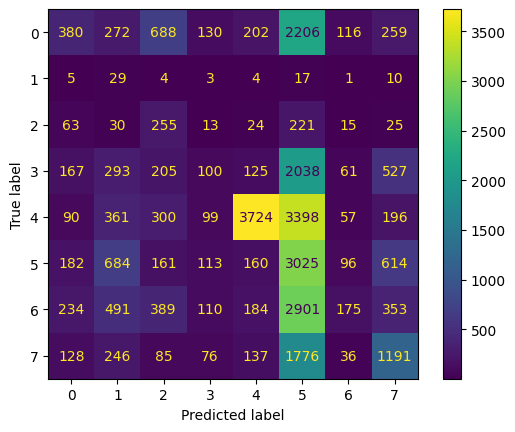

0.21060526788733785
              precision    recall  f1-score   support

       Anger       0.30      0.09      0.14      4253
    Contempt       0.01      0.40      0.02        73
     Disgust       0.12      0.39      0.19       646
        Fear       0.16      0.03      0.05      3516
       Happy       0.82      0.45      0.58      8225
     Neutral       0.19      0.60      0.29      5035
         Sad       0.31      0.04      0.06      4837
    Surprise       0.38      0.32      0.35      3675

    accuracy                           0.29     30260
   macro avg       0.29      0.29      0.21     30260
weighted avg       0.41      0.29      0.29     30260



In [213]:
print("With Emotions Intensity")
metics_reports(y_test_i, gnd_i_with_y)

## Naives Bayes: Con. for the dataset without emotions


Without Emotion Presences
Accurary Score
0.32490504207939225
Confusin Matrix Score


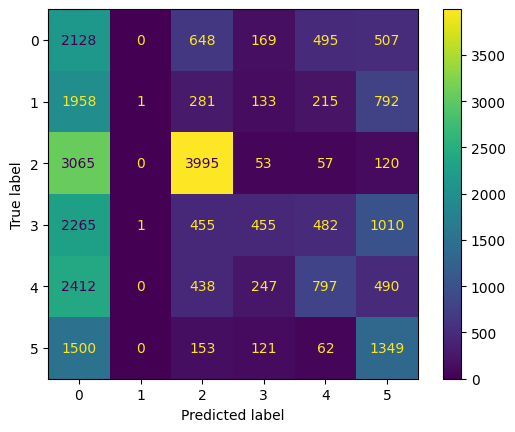

0.2687866475038724
              precision    recall  f1-score   support

       Anger       0.16      0.54      0.25      3947
        Fear       0.50      0.00      0.00      3380
       Happy       0.67      0.55      0.60      7290
     Neutral       0.39      0.10      0.16      4668
         Sad       0.38      0.18      0.25      4384
    Surprise       0.32      0.42      0.36      3185

    accuracy                           0.32     26854
   macro avg       0.40      0.30      0.27     26854
weighted avg       0.43      0.32      0.31     26854



In [214]:
print("Without Emotion Presences")
metics_reports(y_test_without_p, cnb_p_y)

Without Emotion Intensity
Accurary Score
0.309786251582632
Confusin Matrix Score


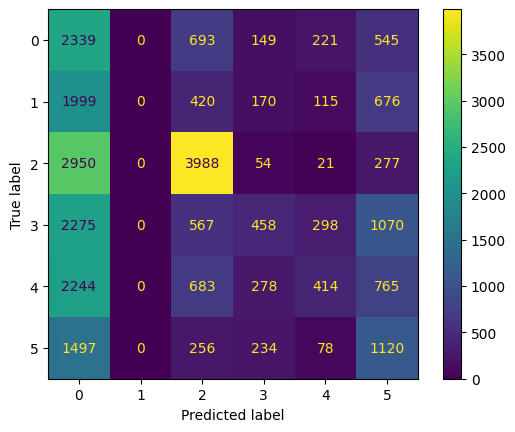

0.24007816126588452
              precision    recall  f1-score   support

       Anger       0.18      0.59      0.27      3947
        Fear       0.00      0.00      0.00      3380
       Happy       0.60      0.55      0.57      7290
     Neutral       0.34      0.10      0.15      4668
         Sad       0.36      0.09      0.15      4384
    Surprise       0.25      0.35      0.29      3185

    accuracy                           0.31     26854
   macro avg       0.29      0.28      0.24     26854
weighted avg       0.34      0.31      0.28     26854



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [215]:
print("Without Emotion Intensity")
metics_reports(y_test_without_i, cnb_i_y)


## Naives Bayes: Con. for the dataset with emotions


With Emotions Presences
Accurary Score
0.2835426305353602
Confusin Matrix Score


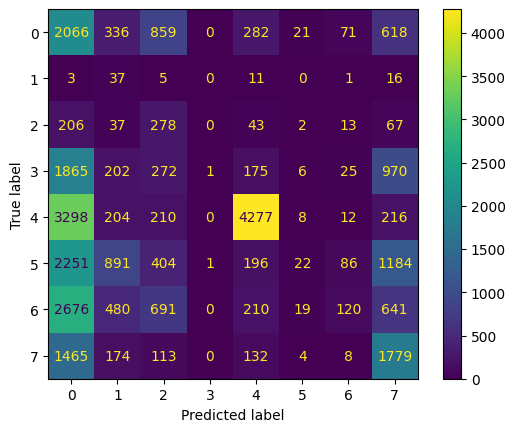

0.18671839674772508
              precision    recall  f1-score   support

       Anger       0.15      0.49      0.23      4253
    Contempt       0.02      0.51      0.03        73
     Disgust       0.10      0.43      0.16       646
        Fear       0.50      0.00      0.00      3516
       Happy       0.80      0.52      0.63      8225
     Neutral       0.27      0.00      0.01      5035
         Sad       0.36      0.02      0.05      4837
    Surprise       0.32      0.48      0.39      3675

    accuracy                           0.28     30260
   macro avg       0.31      0.31      0.19     30260
weighted avg       0.44      0.28      0.26     30260



In [216]:
print("With Emotions Presences")
metics_reports(y_test_p, cnd_p_with_y)

With Emotions Intensity
Accurary Score
0.261004626569729
Confusin Matrix Score


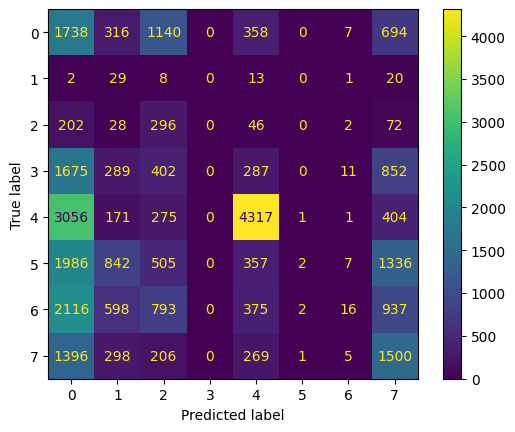

0.16270915217257936
              precision    recall  f1-score   support

       Anger       0.14      0.41      0.21      4253
    Contempt       0.01      0.40      0.02        73
     Disgust       0.08      0.46      0.14       646
        Fear       0.00      0.00      0.00      3516
       Happy       0.72      0.52      0.61      8225
     Neutral       0.33      0.00      0.00      5035
         Sad       0.32      0.00      0.01      4837
    Surprise       0.26      0.41      0.32      3675

    accuracy                           0.26     30260
   macro avg       0.23      0.28      0.16     30260
weighted avg       0.35      0.26      0.24     30260



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [217]:
print("With Emotions Intensity")
metics_reports(y_test_i, cnd_i_with_y)

## Random Forest without Emotions


In [220]:
print("Without Emotions Intensity")
metics_reports(y_test_without_i, rf_without_i_y)

print("Without Emotions Presences")
metics_reports(y_test_without_p, rf_without_p_y)

print("Without Emotions Landmarks")
metics_reports(y_test_without_l, rf_without_l_y)


Without Emotions Intensity


NameError: name 'rf_without_i_y' is not defined

With Emotions Intensity
Accurary Score
0.33536021150033046
Confusin Matrix Score


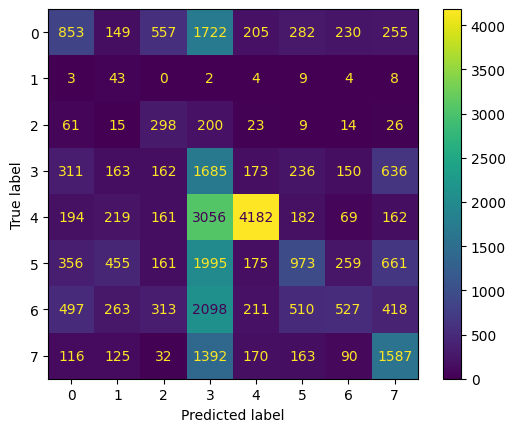

0.2839199299844859
              precision    recall  f1-score   support

       Anger       0.36      0.20      0.26      4253
    Contempt       0.03      0.59      0.06        73
     Disgust       0.18      0.46      0.26       646
        Fear       0.14      0.48      0.22      3516
       Happy       0.81      0.51      0.63      8225
     Neutral       0.41      0.19      0.26      5035
         Sad       0.39      0.11      0.17      4837
    Surprise       0.42      0.43      0.43      3675

    accuracy                           0.34     30260
   macro avg       0.34      0.37      0.28     30260
weighted avg       0.47      0.34      0.36     30260

With Emotions Presences
Accurary Score
0.3515862524785195
Confusin Matrix Score


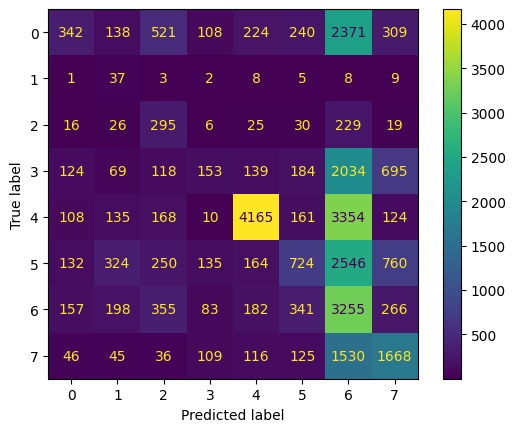

0.2662833556572679
              precision    recall  f1-score   support

       Anger       0.37      0.08      0.13      4253
    Contempt       0.04      0.51      0.07        73
     Disgust       0.17      0.46      0.25       646
        Fear       0.25      0.04      0.07      3516
       Happy       0.83      0.51      0.63      8225
     Neutral       0.40      0.14      0.21      5035
         Sad       0.21      0.67      0.32      4837
    Surprise       0.43      0.45      0.44      3675

    accuracy                           0.35     30260
   macro avg       0.34      0.36      0.27     30260
weighted avg       0.46      0.35      0.34     30260

With Emotions Landmarks
Accurary Score
0.313615333773959
Confusin Matrix Score


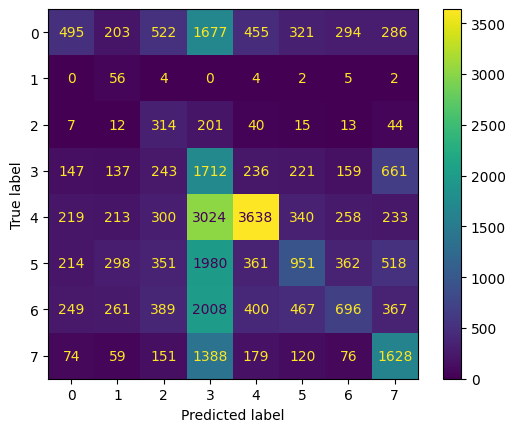

0.2668945473354546
              precision    recall  f1-score   support

       Anger       0.35      0.12      0.17      4253
    Contempt       0.05      0.77      0.09        73
     Disgust       0.14      0.49      0.22       646
        Fear       0.14      0.49      0.22      3516
       Happy       0.68      0.44      0.54      8225
     Neutral       0.39      0.19      0.25      5035
         Sad       0.37      0.14      0.21      4837
    Surprise       0.44      0.44      0.44      3675

    accuracy                           0.31     30260
   macro avg       0.32      0.38      0.27     30260
weighted avg       0.43      0.31      0.33     30260



In [219]:
# Random Forest with Emotions

print("With Emotions Intensity")
metics_reports(y_test_i, rf_i_y)

print("With Emotions Presences")
metics_reports(y_test_p, rf_p_y)

print("With Emotions Landmarks")
metics_reports(y_test_l, rf_l_y)

Decision Tree
Without Emotions Intensity
Accurary Score
0.35339241826171147
Confusin Matrix Score


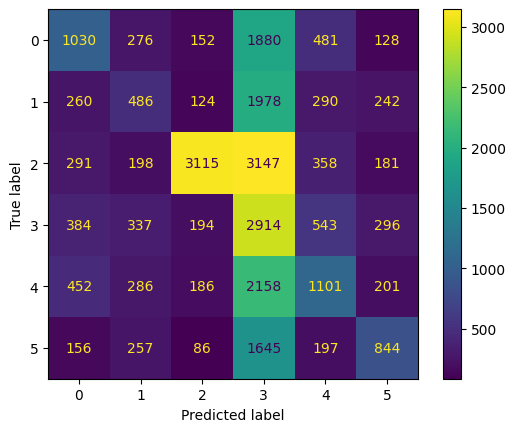

0.334978774119249
              precision    recall  f1-score   support

       Anger       0.40      0.26      0.32      3947
        Fear       0.26      0.14      0.19      3380
       Happy       0.81      0.43      0.56      7290
     Neutral       0.21      0.62      0.32      4668
         Sad       0.37      0.25      0.30      4384
    Surprise       0.45      0.26      0.33      3185

    accuracy                           0.35     26854
   macro avg       0.42      0.33      0.33     26854
weighted avg       0.46      0.35      0.37     26854

Without Emotions Presences
Accurary Score
0.35726521188649735
Confusin Matrix Score


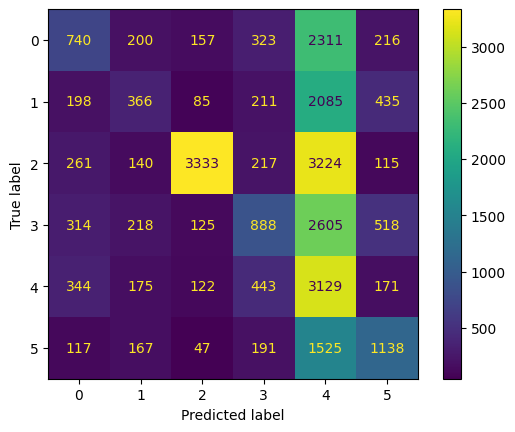

0.3299213954292088
              precision    recall  f1-score   support

       Anger       0.37      0.19      0.25      3947
        Fear       0.29      0.11      0.16      3380
       Happy       0.86      0.46      0.60      7290
     Neutral       0.39      0.19      0.26      4668
         Sad       0.21      0.71      0.32      4384
    Surprise       0.44      0.36      0.39      3185

    accuracy                           0.36     26854
   macro avg       0.43      0.34      0.33     26854
weighted avg       0.48      0.36      0.36     26854

Without Emotions Landmarks
Accurary Score
0.3495196246369256
Confusin Matrix Score


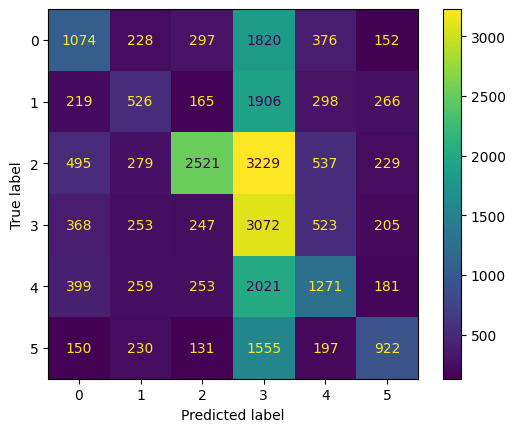

0.33658327514956343
              precision    recall  f1-score   support

       Anger       0.40      0.27      0.32      3947
        Fear       0.30      0.16      0.20      3380
       Happy       0.70      0.35      0.46      7290
     Neutral       0.23      0.66      0.34      4668
         Sad       0.40      0.29      0.34      4384
    Surprise       0.47      0.29      0.36      3185

    accuracy                           0.35     26854
   macro avg       0.41      0.34      0.34     26854
weighted avg       0.45      0.35      0.35     26854



In [221]:
# Decision Tree without Emotions

print("Decision Tree")

print("Without Emotions Intensity")
metics_reports(y_test_without_i, tree_without_i_y)

print("Without Emotions Presences")
metics_reports(y_test_without_p, tree_without_p_y)

print("Without Emotions Landmarks")
metics_reports(y_test_without_l, tree_without_l_y)

With Emotions Intensity
Accurary Score
0.32914738929279574
Confusin Matrix Score


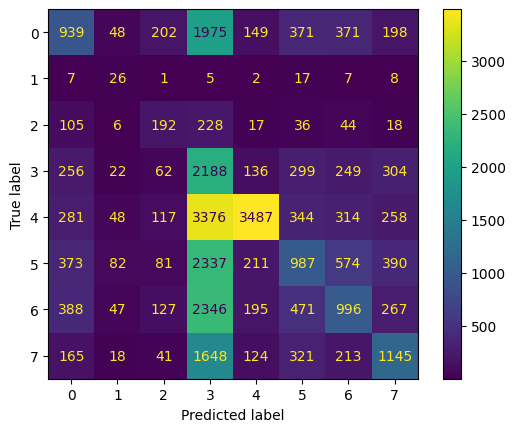

0.29521962344515984
              precision    recall  f1-score   support

       Anger       0.37      0.22      0.28      4253
    Contempt       0.09      0.36      0.14        73
     Disgust       0.23      0.30      0.26       646
        Fear       0.16      0.62      0.25      3516
       Happy       0.81      0.42      0.56      8225
     Neutral       0.35      0.20      0.25      5035
         Sad       0.36      0.21      0.26      4837
    Surprise       0.44      0.31      0.37      3675

    accuracy                           0.33     30260
   macro avg       0.35      0.33      0.30     30260
weighted avg       0.46      0.33      0.35     30260

With Emotions Presences
Accurary Score
0.3619960343688037
Confusin Matrix Score


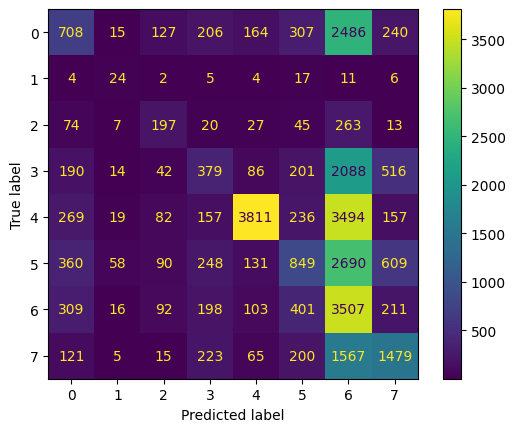

0.31138072266296546
              precision    recall  f1-score   support

       Anger       0.35      0.17      0.23      4253
    Contempt       0.15      0.33      0.21        73
     Disgust       0.30      0.30      0.30       646
        Fear       0.26      0.11      0.15      3516
       Happy       0.87      0.46      0.60      8225
     Neutral       0.38      0.17      0.23      5035
         Sad       0.22      0.73      0.33      4837
    Surprise       0.46      0.40      0.43      3675

    accuracy                           0.36     30260
   macro avg       0.37      0.33      0.31     30260
weighted avg       0.48      0.36      0.36     30260

With Emotions Landmarks
Accurary Score
0.3282551222736286
Confusin Matrix Score


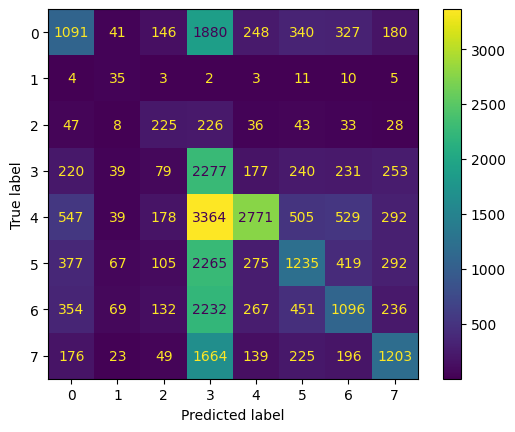

0.3091717435671794
              precision    recall  f1-score   support

       Anger       0.39      0.26      0.31      4253
    Contempt       0.11      0.48      0.18        73
     Disgust       0.25      0.35      0.29       646
        Fear       0.16      0.65      0.26      3516
       Happy       0.71      0.34      0.46      8225
     Neutral       0.40      0.25      0.31      5035
         Sad       0.39      0.23      0.29      4837
    Surprise       0.48      0.33      0.39      3675

    accuracy                           0.33     30260
   macro avg       0.36      0.36      0.31     30260
weighted avg       0.46      0.33      0.35     30260



In [222]:
# Decision Tree with Emotions

print("With Emotions Intensity")
metics_reports(y_test_i, tree_i_y)

print("With Emotions Presences")
metics_reports(y_test_p, tree_p_y)

print("With Emotions Landmarks")
metics_reports(y_test_l, tree_l_y)